# Exploratory Data Analysis for Fake Review Detection

This notebook explores the fake reviews dataset to understand the data distribution, patterns, and relationships between variables.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import os
from wordcloud import WordCloud
import warnings

# Set visualization styles
sns.set(style='whitegrid')
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Download NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

## 1. Loading the Dataset

In [3]:
# Path to the raw dataset
data_path = '../data/raw/fake_reviews.csv'

# Load the dataset
df = pd.read_csv(data_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (40432, 4)

First few rows:


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
# Check for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
# Examine the data types and basic statistics
print("Data types:")
print(df.dtypes)
print("\nBasic statistics for numerical columns:")
df.describe().T


Data types:
category     object
rating      float64
label        object
text_        object
dtype: object

Basic statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
rating,40432.0,4.256579,1.144354,1.0,4.0,5.0,5.0,5.0


## 2. Distribution of Labels

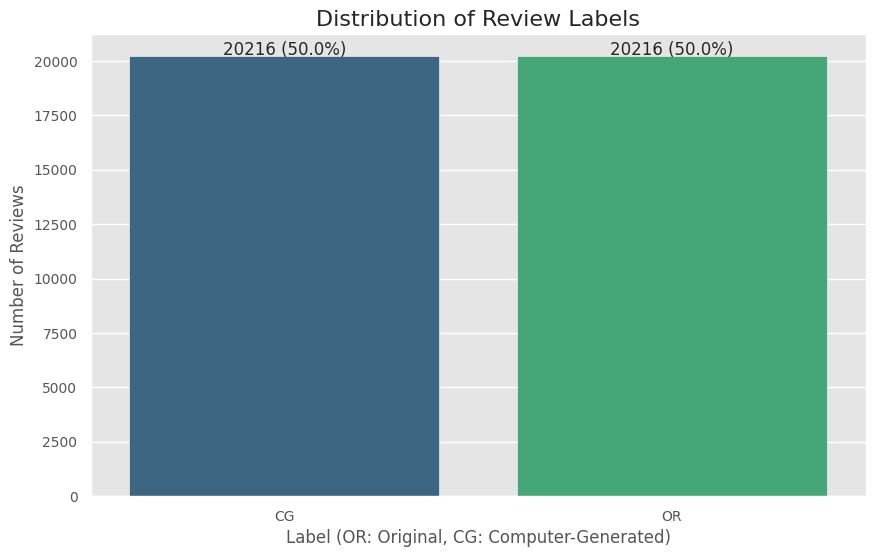

Label distribution:
label
CG    50.0
OR    50.0
Name: proportion, dtype: float64%


In [6]:
# Count of reviews by label (Original vs Computer-Generated)
plt.figure(figsize=(10, 6))
label_counts = df['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Review Labels', fontsize=16)
plt.xlabel('Label (OR: Original, CG: Computer-Generated)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add count and percentage labels above each bar
total = len(df)
for i, count in enumerate(label_counts.values):
    percentage = 100 * count / total
    plt.text(i, count + 50, f"{count} ({percentage:.1f}%)", ha='center', fontsize=12)

plt.show()

print(f"Label distribution:\n{df['label'].value_counts(normalize=True).multiply(100).round(2)}%")


## 3. Relationship Between Category and Label

Distribution of labels within each category (%):

label                           CG    OR
category                                
Books_5                       50.0  50.0
Clothing_Shoes_and_Jewelry_5  50.0  50.0
Electronics_5                 50.0  50.0
Home_and_Kitchen_5            50.0  50.0
Kindle_Store_5                50.0  50.0
Movies_and_TV_5               50.0  50.0
Pet_Supplies_5                50.0  50.0
Sports_and_Outdoors_5         50.0  50.0
Tools_and_Home_Improvement_5  50.0  50.0
Toys_and_Games_5              50.0  50.0


<Figure size 1200x800 with 0 Axes>

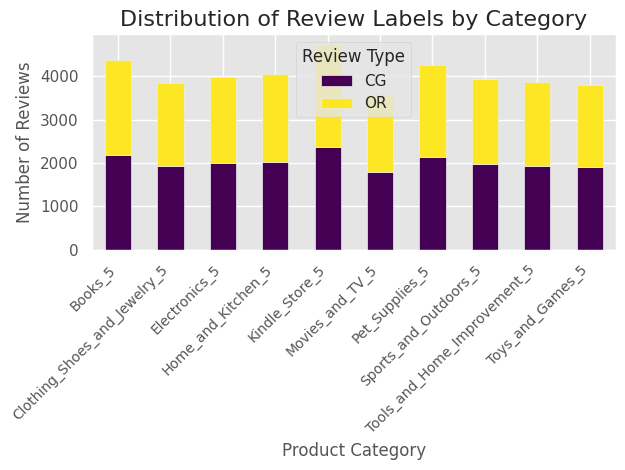

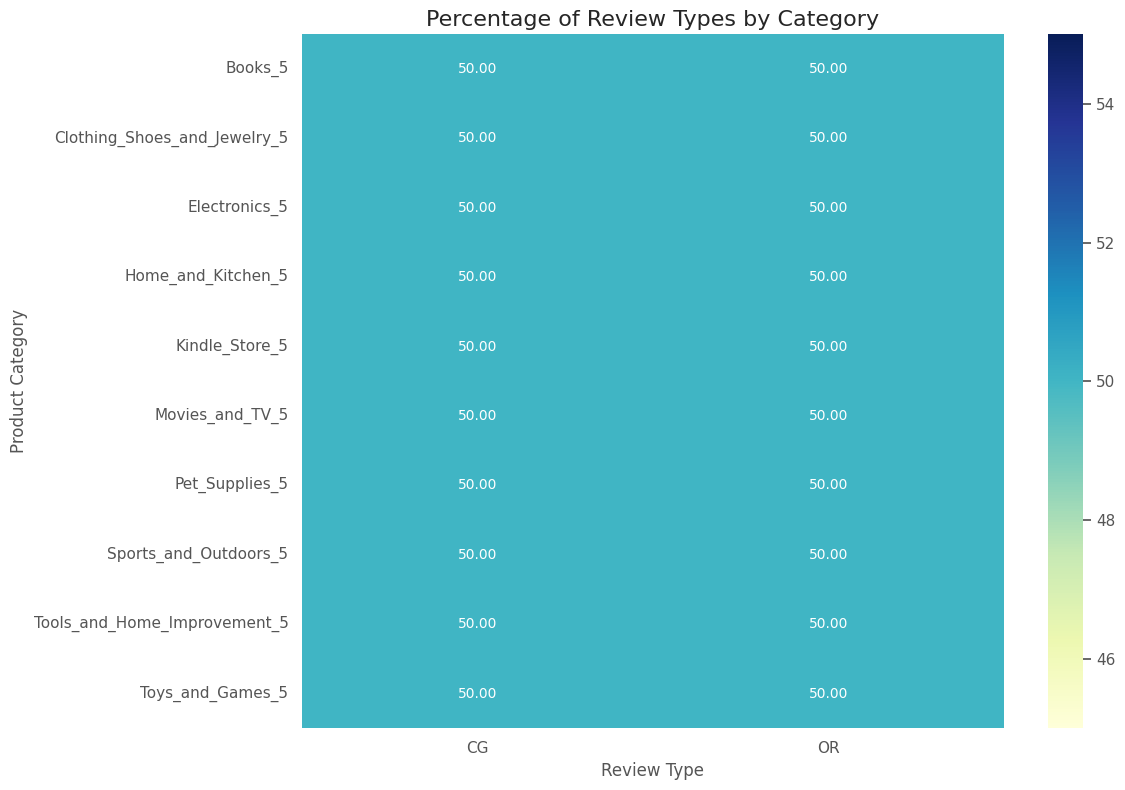

In [7]:
# Create a cross-tabulation of category vs. label
category_label_crosstab = pd.crosstab(df['category'], df['label'], normalize='index').multiply(100).round(2)
print("Distribution of labels within each category (%):\n")
print(category_label_crosstab)

# Plot the relationship between category and label
plt.figure(figsize=(12, 8))
crosstab = pd.crosstab(df['category'], df['label'])
crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Review Labels by Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Review Type', title_fontsize=12)
plt.tight_layout()
plt.show()

# Create a heatmap to visualize the distribution
plt.figure(figsize=(12, 8))
sns.heatmap(category_label_crosstab, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Percentage of Review Types by Category', fontsize=16)
plt.xlabel('Review Type', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()


## 4. Relationship Between Rating and Label

Distribution of labels for each rating (%):

label      CG     OR
rating              
1.0     49.33  50.67
2.0     48.91  51.09
3.0     51.56  48.44
4.0     49.22  50.78
5.0     50.16  49.84


<Figure size 1200x800 with 0 Axes>

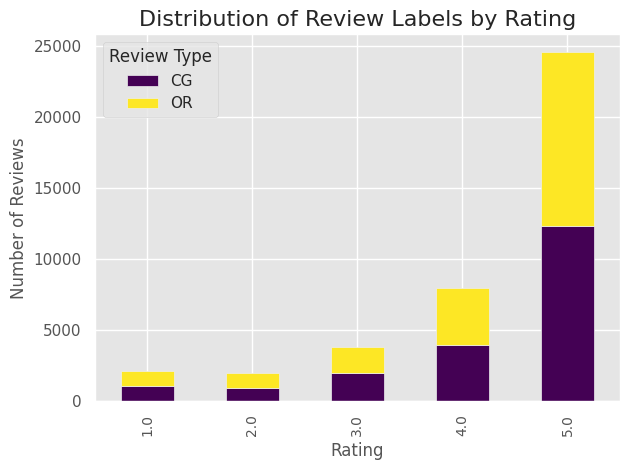

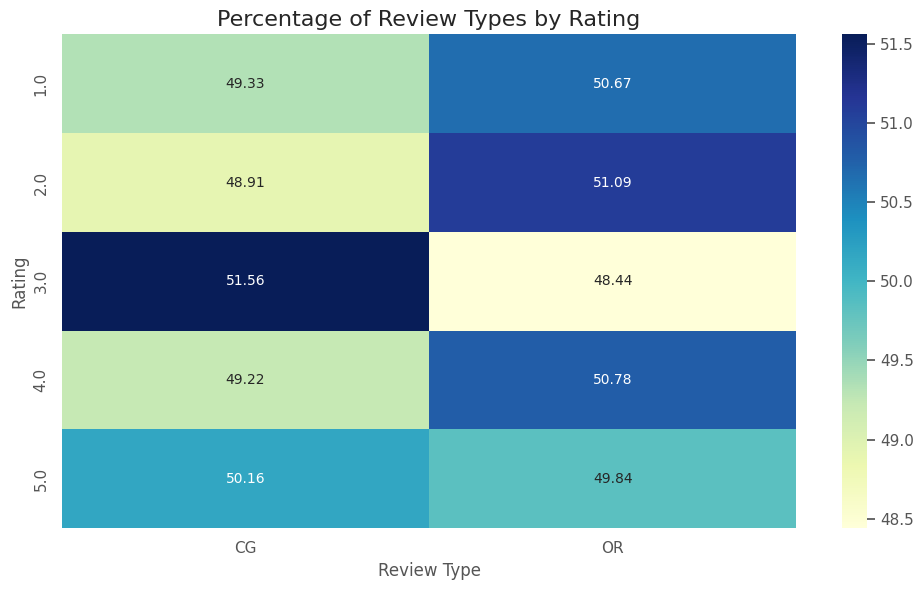

In [8]:
# Create a cross-tabulation of rating vs. label
rating_label_crosstab = pd.crosstab(df['rating'], df['label'], normalize='index').multiply(100).round(2)
print("Distribution of labels for each rating (%):\n")
print(rating_label_crosstab)

# Plot the relationship between rating and label
plt.figure(figsize=(12, 8))
rating_crosstab = pd.crosstab(df['rating'], df['label'])
rating_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Review Labels by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title='Review Type', title_fontsize=12)
plt.tight_layout()
plt.show()

# Create a heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(rating_label_crosstab, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Percentage of Review Types by Rating', fontsize=16)
plt.xlabel('Review Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()

## 5. Distribution of Reviews by Category

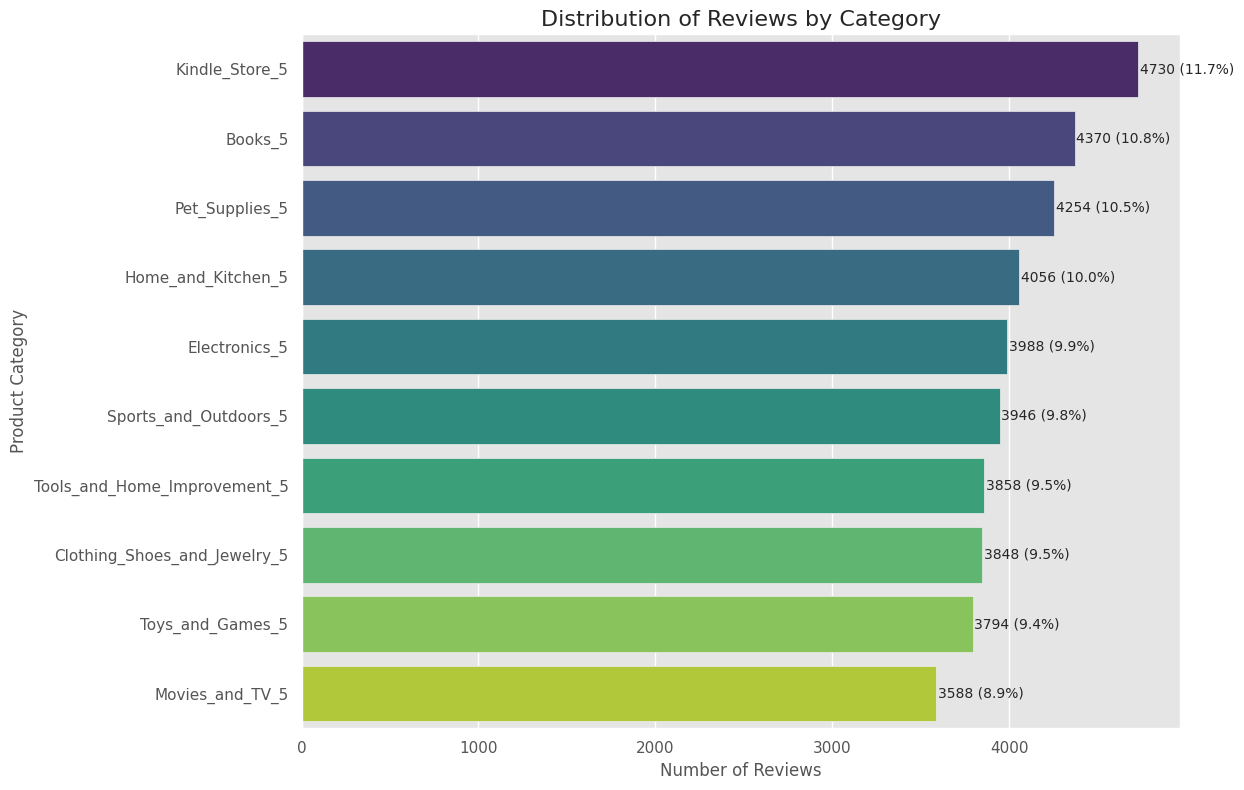

Category distribution:
category
Kindle_Store_5                  11.70
Books_5                         10.81
Pet_Supplies_5                  10.52
Home_and_Kitchen_5              10.03
Electronics_5                    9.86
Sports_and_Outdoors_5            9.76
Tools_and_Home_Improvement_5     9.54
Clothing_Shoes_and_Jewelry_5     9.52
Toys_and_Games_5                 9.38
Movies_and_TV_5                  8.87
Name: proportion, dtype: float64%


In [9]:
# Count of reviews by category
plt.figure(figsize=(12, 8))
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Distribution of Reviews by Category', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()

# Add count and percentage labels on each bar
total = len(df)
for i, count in enumerate(category_counts.values):
    percentage = 100 * count / total
    plt.text(count + 10, i, f"{count} ({percentage:.1f}%)", va='center', fontsize=10)

plt.show()

print(f"Category distribution:\n{df['category'].value_counts(normalize=True).multiply(100).round(2)}%")


## 6. Distribution of Reviews by Rating


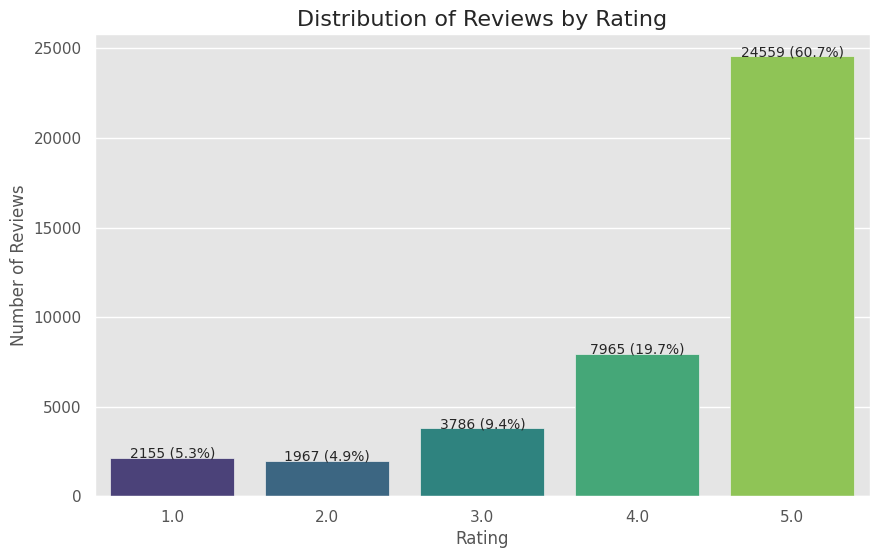

Rating distribution:
rating
1.0     5.33
2.0     4.86
3.0     9.36
4.0    19.70
5.0    60.74
Name: proportion, dtype: float64%


In [10]:
# Count of reviews by rating
plt.figure(figsize=(10, 6))
rating_counts = df['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Reviews by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Add count and percentage labels above each bar
total = len(df)
for i, count in enumerate(rating_counts.values):
    percentage = 100 * count / total
    plt.text(i, count + 10, f"{count} ({percentage:.1f}%)", ha='center', fontsize=10)

plt.show()

print(f"Rating distribution:\n{df['rating'].value_counts(normalize=True).multiply(100).round(2).sort_index()}%")
